# Fecha de entrega: 24/09/2022 (corresponde a las clases 23/24)

# Algoritmos de boosting

# Diccionario

**BTC_metals_fv** (data set "BTC_metals" reducido según las conclusiones referidas en el punto 7 del documento "Primera entrega")

- **Date**: fecha en YYYY-MM-DD (object [ns])
- **Price**: precio de cierre de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- **Open**: precio de apertura de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- **High**: precio más alto de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- **Low**: precio más bajo de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- **Vol.**: volumen de BTC (Número de intercambios) en el día de la fecha (float) (Variable numérica continua)
- **Percentage_diff**: diferencia porcentual del precio de BTC en la fecha [x+1] con respecto a la fecha [x] (float) (Variable numérica continua) 
- **Target**: 1 indica que en el día de la fecha el precio de BTC subió, y 0 que el precio bajó (float) (Se la tratará como variable categórica)
- **Price_gold**: indica el precio de cierre del oro en el día de la fecha (float) (USD) (variable numérica continua)
- **Perc_diff_gold**: diferencial porcentual del precio del oro de la fecha [x+1] con respecto a la fecha [x] (float) (variable numérica continua)
- **Price_copper**: indica el precio de cierre del cobre en el día de la fecha (float) (USD) (variable numérica continua)
- **Perc_diff_copper**:  diferencial porcentual del precio del cobre en la fecha [x+1] con respecto a la fecha [x] (float) (variable numérica continua)
- **Price_platinum**: indica el precio de cierre del platino en el día de la fecha (float) (USD) (variable numérica continua)
- **Perc_diff_platinum**:  diferencial porcentual del precio del platino en la fecha [x+1] con respecto a la fecha [x] (float) (variable numérica continua)
- **Price_palladium**: indica el precio de cierre del paladio en el día de la fecha (float) (USD) (variable numérica continua)
- **Perc_diff_palladium**: diferencial porcentual del precio del paladio en la fecha [x+1] con respecto a la fecha [x] (float) (variable numérica continua)
- **Trend**: indica la tendencia de la serie de tiempo en relación con la variable [Price] (float) (variable numérica continua)
- **Residuals**: indica los residuales de la serie de tiempo en relación con la variable [Price] (float) (variable numérica continua)

# Librerías

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas_profiling
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.cm import ScalarMappable

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('darkgrid')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

C:\Users\lucia\anaconda3\envs\acjup\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\lucia\anaconda3\envs\acjup\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Data acquisition

In [2]:
def gdriveColabPath(sharing_url):
  file_id=sharing_url.split('/')[-2]
  dwn_url='https://drive.google.com/uc?id=' + file_id
  return dwn_url

## Adquiriendo BTC_metals

In [3]:
# Se carga la base de datos de BTC_metals_fv desde la carpeta compartida en el Google Drive
sharing_url = "https://drive.google.com/file/d/1lU7RCERkjbbrHv8OiQb2EI4PIpk_3BW0/view?usp=sharing"

In [4]:
dwn_url=gdriveColabPath(sharing_url)
BTC_metals_fv_df = pd.read_csv(dwn_url, sep=";", decimal=".")
BTC_metals_fv_df.head()

,Date,Price,Open,High,Low,Vol.,Percentage_diff,Target,Price_gold,Perc_diff_gold,Price_copper,Perc_diff_copper,Price_aluminium,Perc_diff_aluminium,Trend,Residuals
0,2014-06-23,591.2,603.6,604.7,582.9,2650.0,-2.06,0.0,1318.0,0.14,3.146,0.90,1892.5,0.21,NaN,NaN
1,2014-06-24,588.8,591.2,595.7,585.4,3080.0,-0.41,0.0,1320.9,0.22,3.147,0.03,1901.0,0.45,NaN,NaN
2,2014-06-25,568.5,588.8,589.6,566.9,3090.0,-3.45,0.0,1322.2,0.10,3.160,0.41,1903.5,0.13,NaN,NaN
3,2014-06-26,582.7,568.5,582.7,565.8,4150.0,2.51,1.0,1316.1,-0.46,3.161,0.03,1898.0,-0.29,590.300000,15.543527
4,2014-06-27,602.2,582.7,603.9,580.1,3390.0,3.35,1.0,1319.0,0.22,3.149,-0.38,1885.0,-0.68,596.571429,20.802061


# Data wrangling

## Análisis pre-modelado

In [5]:
# Registros y columnas
BTC_metals_fv_df.shape

(2949, 16)

In [6]:
# Nombre de columnas
BTC_metals_fv_df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Percentage_diff',
       'Target', 'Price_gold', 'Perc_diff_gold', 'Price_copper',
       'Perc_diff_copper', 'Price_aluminium', 'Perc_diff_aluminium', 'Trend',
       'Residuals'],
      dtype='object')

In [7]:
# Tipos de datos de las variables
BTC_metals_fv_df.dtypes

Date                    object
Price                  float64
Open                   float64
High                   float64
Low                    float64
Vol.                   float64
Percentage_diff        float64
Target                 float64
Price_gold             float64
Perc_diff_gold         float64
Price_copper           float64
Perc_diff_copper       float64
Price_aluminium        float64
Perc_diff_aluminium    float64
Trend                  float64
Residuals              float64
dtype: object

In [8]:
# Columnas y cantidad de registros
BTC_metals_fv_df.count()

Date                   2949
Price                  2949
Open                   2949
High                   2949
Low                    2949
Vol.                   2949
Percentage_diff        2949
Target                 2949
Price_gold             2949
Perc_diff_gold         2949
Price_copper           2949
Perc_diff_copper       2949
Price_aluminium        2949
Perc_diff_aluminium    2949
Trend                  2943
Residuals              2943
dtype: int64

In [9]:
# Valores NaN
BTC_metals_fv_df.isnull().sum()

Date                   0
Price                  0
Open                   0
High                   0
Low                    0
Vol.                   0
Percentage_diff        0
Target                 0
Price_gold             0
Perc_diff_gold         0
Price_copper           0
Perc_diff_copper       0
Price_aluminium        0
Perc_diff_aluminium    0
Trend                  6
Residuals              6
dtype: int64

Observaciones:

Se observaron 12 NaN en "BTC_metals_fv.csv" => 6 valores NaN en la variable [Trend] y 6 valores NaN en la variable [Residuals]. Esto implica la necesidad de tomar una decisión con respecto a tipo de valores (instancia previa al modelado). 

Se descarta rellenar los NaN con promedios de valores previos y/o posteriores por varias razones:

1. En ambas variables, 3 de los 6 valores NaN se encuentran al principio de la serie, y los restantes 3 al final de la misma. Esto significa que no se puede hacer un promedio con valores anteriores y posteriores a los valores NaN sino solo con anteriores o posteriores según el caso. Proceder con un promedio con los datos anteriores o posteriores en una serie de tiempo supone un problema extra (¿cuántos valores hacia atrás o hacia adelante se deben tomar?, ¿cuál es el grado de autocorrelación con los valores anteriores o posteriores?, entre otros). 


2. En la variable [Residuals] hay valores positivos y negativos en los registros anteriores y posteriores inmediatos según el caso. Esto también añade un problema extra (¿qué signo se debería utilizar si se rellenan esos casilleros?).


3. La tercera opción es dejar que los modelos se encarguen de procesar y analizar los NaN (lo que parece la opción más coherente en esta instancia), y si esto no funciona por las características de los modelos (error crítico/insalvable), por último, se decidirá eliminar esos registros. Al no tratarse de un problema de regresión lineal del valor que tomaría el precio de BTC en el registro siguiente sino un problema de clasificación, la eliminación de los 6 valores NaN no afectaría en demasía la predicción del modelo a pesar de la autocorrelación referida en el punto 2.

## Ultimas manipulaciones pre-modelado

Se reindexa el data set que se modelará a fin de que la variable [Date] funcione como nuevo índice de la base de datos.

In [10]:
# Se crea una copia de BTC_metals_fv_df con nombre BTC_metals y se la reindexa con la variable [Date] como nuevo índice
BTC_metals = BTC_metals_fv_df.set_index("Date")

In [11]:
BTC_metals.tail()

,Price,Open,High,Low,Vol.,Percentage_diff,Target,Price_gold,Perc_diff_gold,Price_copper,Perc_diff_copper,Price_aluminium,Perc_diff_aluminium,Trend,Residuals
Date,,,,,,,,,,,,,,,
2022-07-15,20825.1,20586.1,21178.1,20393.4,164670.0,1.16,1.0,1703.60,-0.13,3.2455,0.49,2344.0,0.69,20787.614286,52.659204
2022-07-16,21209.9,20825.2,21561.3,20484.4,136890.0,1.85,1.0,1703.60,0.00,3.2455,0.00,2344.0,0.00,21370.371429,-160.520267
2022-07-17,20785.6,21209.8,21654.4,20755.2,132810.0,-2.00,0.0,1703.60,0.00,3.2455,0.00,2344.0,0.00,NaN,NaN
2022-07-18,22525.8,20785.6,22714.9,20770.6,279720.0,8.37,1.0,1710.20,0.39,3.3167,2.18,2435.0,3.88,NaN,NaN
2022-07-19,23410.2,22529.3,23757.3,21581.8,308910.0,3.93,1.0,1708.05,-0.13,3.2965,-0.61,2386.0,-2.01,NaN,NaN


Dado que en la práctica real solo se tiene hasta los valores del registro anterior al que se quiere predecir se intenta hacer un shift (-1) a la variable [Target]. Se entiende que así (en caso de que el modelo prediga con previsibilidad suficiente) se podría estar seguro de que después vendría el valor de [Target] original sin shift (-1).

In [12]:
# Se genera un back up
BTC_metals_2 = BTC_metals.copy()

In [13]:
# Se realiza el shift 
BTC_metals_2 ["Target"] = BTC_metals_2 ["Target"].shift(-1)

In [14]:
BTC_metals_2.tail()

,Price,Open,High,Low,Vol.,Percentage_diff,Target,Price_gold,Perc_diff_gold,Price_copper,Perc_diff_copper,Price_aluminium,Perc_diff_aluminium,Trend,Residuals
Date,,,,,,,,,,,,,,,
2022-07-15,20825.1,20586.1,21178.1,20393.4,164670.0,1.16,1.0,1703.60,-0.13,3.2455,0.49,2344.0,0.69,20787.614286,52.659204
2022-07-16,21209.9,20825.2,21561.3,20484.4,136890.0,1.85,0.0,1703.60,0.00,3.2455,0.00,2344.0,0.00,21370.371429,-160.520267
2022-07-17,20785.6,21209.8,21654.4,20755.2,132810.0,-2.00,1.0,1703.60,0.00,3.2455,0.00,2344.0,0.00,NaN,NaN
2022-07-18,22525.8,20785.6,22714.9,20770.6,279720.0,8.37,1.0,1710.20,0.39,3.3167,2.18,2435.0,3.88,NaN,NaN
2022-07-19,23410.2,22529.3,23757.3,21581.8,308910.0,3.93,NaN,1708.05,-0.13,3.2965,-0.61,2386.0,-2.01,NaN,NaN


Dado que ninguno de los modelos que se ejecutarán debajo no admiten valores NaN en la variable target se procede a la eliminación del último registro.

In [15]:
BTC_metals_2 = BTC_metals_2.drop (index="2022-07-19", axis=0)

In [16]:
BTC_metals_2.tail()

,Price,Open,High,Low,Vol.,Percentage_diff,Target,Price_gold,Perc_diff_gold,Price_copper,Perc_diff_copper,Price_aluminium,Perc_diff_aluminium,Trend,Residuals
Date,,,,,,,,,,,,,,,
2022-07-14,20586.0,20250.0,20862.2,19664.9,205280.0,1.66,1.0,1705.8,-1.71,3.2298,-2.54,2328.0,-1.48,20421.528571,187.614955
2022-07-15,20825.1,20586.1,21178.1,20393.4,164670.0,1.16,1.0,1703.6,-0.13,3.2455,0.49,2344.0,0.69,20787.614286,52.659204
2022-07-16,21209.9,20825.2,21561.3,20484.4,136890.0,1.85,0.0,1703.6,0.00,3.2455,0.00,2344.0,0.00,21370.371429,-160.520267
2022-07-17,20785.6,21209.8,21654.4,20755.2,132810.0,-2.00,1.0,1703.6,0.00,3.2455,0.00,2344.0,0.00,NaN,NaN
2022-07-18,22525.8,20785.6,22714.9,20770.6,279720.0,8.37,1.0,1710.2,0.39,3.3167,2.18,2435.0,3.88,NaN,NaN


Dado que la mayoría de los modelos no admiten valores NaN, se eliminan los registros de este tipo.

Por ejemplo, **error**: AdaBoostClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [17]:
BTC_metals_2 = BTC_metals_2.dropna()

In [18]:
BTC_metals_2.isnull().sum()

Price                  0
Open                   0
High                   0
Low                    0
Vol.                   0
Percentage_diff        0
Target                 0
Price_gold             0
Perc_diff_gold         0
Price_copper           0
Perc_diff_copper       0
Price_aluminium        0
Perc_diff_aluminium    0
Trend                  0
Residuals              0
dtype: int64

# Modelado

**...Recordando que...**

*Objetivo general del proyecto*

I.	Diseñar diversos modelos de machine learning capaces de predecir con cierto grado de previsibilidad positiva (>50/55%) el dinamismo del precio de Bitcoin en el corto plazo, es decir, si el precio de este criptoactivo subirá o bajará en la temporalidad estudiada (+1 día).

**Explicación**:

- En lo que sigue se procederá a realizar varios modelos supervisados de clasificación de tipo "decision tree". 
- Estos serán configurados con diversos hiperparámetros a fin de encontrar el resultado más óptimo para este data set.
- La columna [Target] de BTC_metals_2 será considerada su variable target.

## Adaboost

In [19]:
# Se cargan las librearía necesarias
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
# Se definen X e y
X = BTC_metals_2.drop (['Target'],axis=1)
y = BTC_metals_2 ['Target']

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
# Se crea el modelo AdaBoostClassifier
ada = AdaBoostClassifier()

Se contruye la grilla de GridSerarchCV.

In [24]:
# Se definelos hyperparámetros
param_grid = {'n_estimators': np.arange(1, 100, 1), 
              'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'random_state': np.arange (1,1000,1)  
             }

from sklearn.model_selection import RandomizedSearchCV
# Se utiliza la grilla definida anteriormente y se agrega Cross validation con k=5 
model = RandomizedSearchCV(ada, param_grid, verbose=3, n_iter=100, cv=5)

In [25]:
#Se fitea el modelo
model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END learning_rate=10, n_estimators=50, random_state=894;, score=0.380 total time=   0.2s
[CV 2/5] END learning_rate=10, n_estimators=50, random_state=894;, score=0.295 total time=   0.1s
[CV 3/5] END learning_rate=10, n_estimators=50, random_state=894;, score=0.348 total time=   0.1s
[CV 4/5] END learning_rate=10, n_estimators=50, random_state=894;, score=0.310 total time=   0.2s
[CV 5/5] END learning_rate=10, n_estimators=50, random_state=894;, score=0.343 total time=   0.2s
[CV 1/5] END learning_rate=100, n_estimators=1, random_state=545;, score=0.616 total time=   0.0s
[CV 2/5] END learning_rate=100, n_estimators=1, random_state=545;, score=0.709 total time=   0.0s
[CV 3/5] END learning_rate=100, n_estimators=1, random_state=545;, score=0.660 total time=   0.0s
[CV 4/5] END learning_rate=100, n_estimators=1, random_state=545;, score=0.684 total time=   0.0s
[CV 5/5] END learning_rate=100, n_estimators=1, random_

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=100,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1, 10, 100,
                                                          1000],
                                        'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 6...
       911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923,
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988,
       989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999])},
                   verbose=3)

In [26]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'random_state': 545, 'n_estimators': 1, 'learning_rate': 100}
Mejor Score: 0.6660983873153543



In [27]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores.sort_values("mean_test_score", ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_state,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
30,0.108703,0.003790,0.001604,0.003207,779,23,0.001,"{'random_state': 779, 'n_estimators': 23, 'learning_rate': 0.001}",0.615711,0.70913,0.660297,0.683652,0.661702,0.666098,0.030827,1
15,0.271415,0.014037,0.005781,0.006071,369,59,0.0001,"{'random_state': 369, 'n_estimators': 59, 'learning_rate': 0.0001}",0.615711,0.70913,0.660297,0.683652,0.661702,0.666098,0.030827,1
77,0.411918,0.019158,0.020867,0.005847,477,93,0.001,"{'random_state': 477, 'n_estimators': 93, 'learning_rate': 0.001}",0.615711,0.70913,0.660297,0.683652,0.661702,0.666098,0.030827,1
36,0.077649,0.005192,0.003599,0.003001,757,16,0.001,"{'random_state': 757, 'n_estimators': 16, 'learning_rate': 0.001}",0.615711,0.70913,0.660297,0.683652,0.661702,0.666098,0.030827,1
27,0.077968,0.010019,0.001406,0.002813,27,17,0.01,"{'random_state': 27, 'n_estimators': 17, 'learning_rate': 0.01}",0.615711,0.70913,0.660297,0.683652,0.661702,0.666098,0.030827,1


In [28]:
# Se ejecuta la predicción de resultados con X_test
predictions = model.predict(X_test)

In [29]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.6621392190152802


In [30]:
cm = confusion_matrix(y_test,predictions)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[189  87]
 [112 201]]


Accuracy of the classifier is: 0.6621392190152802
Precision Score of the classifier is: 0.6979166666666666
Recall Score of the classifier is: 0.6421725239616614
F1 Score of the classifier is: 0.6688851913477537
AUC for our classifier is: 0.6634775663286567


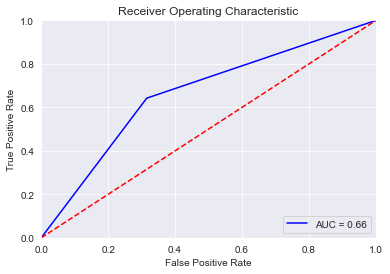

In [31]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- Al modelo le cuesta detectar las clases (hay mucho falsos positivos y negativos).

## Gradient Boosting Classifier

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
# Se definen X e y
X = BTC_metals_2.drop (['Target'],axis=1)
y = BTC_metals_2 ['Target']

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [34]:
# Se crea el modelo Gradient Boosting Classifier
gbrt = GradientBoostingClassifier()

Se contruye la grilla de RandomizedSearchCV.

In [39]:
# Se definelos hyperparámetros
param_grid = {'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'n_estimators':[100, 1000, 10000],
              'subsample':[0.00001, 0.0001, 0.001, 0.01, 0.1, 0.99],
              'criterion': ['squared_error'],
              'warm_start': [False, True],
              'random_state': np.arange (1,1000,1)
              }

# Se uitiliza la RandomizedSearchCV y se agrega Cross validation con k=5 
model = RandomizedSearchCV(gbrt, param_grid, cv=5, n_iter=50, verbose=2)

In [40]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END criterion=squared_error, learning_rate=1000, n_estimators=1000, random_state=830, subsample=0.0001, warm_start=False; total time=   0.7s
[CV] END criterion=squared_error, learning_rate=1000, n_estimators=1000, random_state=830, subsample=0.0001, warm_start=False; total time=   0.6s
[CV] END criterion=squared_error, learning_rate=1000, n_estimators=1000, random_state=830, subsample=0.0001, warm_start=False; total time=   0.6s
[CV] END criterion=squared_error, learning_rate=1000, n_estimators=1000, random_state=830, subsample=0.0001, warm_start=False; total time=   0.6s
[CV] END criterion=squared_error, learning_rate=1000, n_estimators=1000, random_state=830, subsample=0.0001, warm_start=False; total time=   0.6s
[CV] END criterion=squared_error, learning_rate=1000, n_estimators=100, random_state=416, subsample=0.99, warm_start=True; total time=   0.5s
[CV] END criterion=squared_error, learning_rate=1000, n_estimators

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=50,
                   param_distributions={'criterion': ['squared_error'],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1, 10, 100,
                                                          1000],
                                        'n_estimators': [100, 1000, 10000],
                                        'random_state': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  4...
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988,
       989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]),
                                        'subsample': [1e-05, 0.0001, 0.001,
                                                      0.01, 0.1, 0.99],
                                        'warm_start': [False, True]},
                   verbose=2)

In [41]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'warm_start': True, 'subsample': 0.01, 'random_state': 303, 'n_estimators': 10000, 'learning_rate': 0.0001, 'criterion': 'squared_error'}
Mejor Score: 0.6723300970873787



In [42]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores.sort_values("mean_test_score", ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_warm_start,param_subsample,param_random_state,param_n_estimators,param_learning_rate,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,8.162959,0.278752,0.085048,0.007200,True,0.01,303,10000,0.0001,squared_error,"{'warm_start': True, 'subsample': 0.01, 'random_state': 303, 'n_estimators': 10000, 'learning_rate': 0.0001, 'criterion': 'squared_error'}",0.686893,0.672330,0.672330,0.672330,0.657767,0.672330,0.009211,1
17,0.806995,0.007509,0.009376,0.007656,False,0.01,3,1000,0.001,squared_error,"{'warm_start': False, 'subsample': 0.01, 'random_state': 3, 'n_estimators': 1000, 'learning_rate': 0.001, 'criterion': 'squared_error'}",0.689320,0.669903,0.667476,0.669903,0.652913,0.669903,0.011590,2
46,0.630091,0.005292,0.000000,0.000000,True,0.99,531,100,0.1,squared_error,"{'warm_start': True, 'subsample': 0.99, 'random_state': 531, 'n_estimators': 100, 'learning_rate': 0.1, 'criterion': 'squared_error'}",0.677184,0.628641,0.650485,0.645631,0.633495,0.647087,0.016997,3
48,0.145203,0.005765,0.003127,0.006253,True,0.1,795,100,1000,squared_error,"{'warm_start': True, 'subsample': 0.1, 'random_state': 795, 'n_estimators': 100, 'learning_rate': 1000, 'criterion': 'squared_error'}",0.667476,0.611650,0.643204,0.648058,0.626214,0.639320,0.019087,4
24,63.046368,0.210278,0.059345,0.011670,False,0.99,937,10000,0.01,squared_error,"{'warm_start': False, 'subsample': 0.99, 'random_state': 937, 'n_estimators': 10000, 'learning_rate': 0.01, 'criterion': 'squared_error'}",0.662621,0.618932,0.631068,0.665049,0.604369,0.636408,0.023949,5


In [43]:
# Se ejecuta la predicción de resultados con X_test
predictions = model.predict(X_test)

In [44]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.636466591166478


In [45]:
cm = confusion_matrix(y_test,predictions)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[240 183]
 [138 322]]


Accuracy of the classifier is: 0.636466591166478
Precision Score of the classifier is: 0.6376237623762376
Recall Score of the classifier is: 0.7
F1 Score of the classifier is: 0.6673575129533679
AUC for our classifier is: 0.7010124370438894


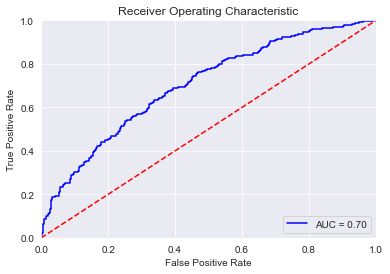

In [46]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- Al modelo le cuesta detectar las clases (hay mucho falsos positivos y negativos).

## XG Boost

In [47]:
import xgboost as xgb

In [48]:
# Se definen X e y
X = BTC_metals_2.drop (['Target'],axis=1)
y = BTC_metals_2 ['Target']

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
clf_xgb = xgb.XGBClassifier()

Se contruye la grilla de RandomizedSearchCV.

In [65]:
# Se definelos hyperparámetros
param_grid = {'booster':['gbtree', 'gblinear','dart', 'gbtree and dart'],
              'validate_parameters':[True, False],
              'seed': np.arange (1,1000,1),
              'n_estimators': np.arange (1,1000,1),
              'eval_metric': ['logloss'],
              'scale_pos_weight': [2,3]
              }

# Se uitiliza la RandomizedSearchCV y se agrega Cross validation con k=5 
model = RandomizedSearchCV(clf_xgb, param_grid, cv=5, n_iter=100, verbose=2)

In [66]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END booster=gbtree, eval_metric=logloss, n_estimators=133, scale_pos_weight=2, seed=750, validate_parameters=True; total time=   0.5s
[CV] END booster=gbtree, eval_metric=logloss, n_estimators=133, scale_pos_weight=2, seed=750, validate_parameters=True; total time=   0.5s
[CV] END booster=gbtree, eval_metric=logloss, n_estimators=133, scale_pos_weight=2, seed=750, validate_parameters=True; total time=   0.5s
[CV] END booster=gbtree, eval_metric=logloss, n_estimators=133, scale_pos_weight=2, seed=750, validate_parameters=True; total time=   0.5s
[CV] END booster=gbtree, eval_metric=logloss, n_estimators=133, scale_pos_weight=2, seed=750, validate_parameters=True; total time=   0.5s
[CV] END booster=gbtree, eval_metric=logloss, n_estimators=834, scale_pos_weight=3, seed=121, validate_parameters=False; total time=   2.7s
[CV] END booster=gbtree, eval_metric=logloss, n_estimators=834, scale_pos_weight=3, seed=121, validate

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimat...
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988,
       989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]),
                                        'validate_parameters': [True, False]},
                   verbose=2)

In [67]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'validate_parameters': True, 'seed': 37, 'scale_pos_weight': 2, 'n_estimators': 741, 'eval_metric': 'logloss', 'booster': 'dart'}
Mejor Score: 0.6457171251750463



In [68]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores.sort_values("mean_test_score", ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_validate_parameters,param_seed,param_scale_pos_weight,param_n_estimators,param_eval_metric,param_booster,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
48,38.332483,0.335096,0.124914,0.000011,True,37,2,741,logloss,dart,"{'validate_parameters': True, 'seed': 37, 'scale_pos_weight': 2, 'n_estimators': 741, 'eval_metric': 'logloss', 'booster': 'dart'}",0.651805,0.602972,0.664544,0.645435,0.663830,0.645717,0.022569,1
63,2.184376,0.070817,0.000000,0.000000,True,417,2,592,logloss,gbtree,"{'validate_parameters': True, 'seed': 417, 'scale_pos_weight': 2, 'n_estimators': 592, 'eval_metric': 'logloss', 'booster': 'gbtree'}",0.647558,0.602972,0.666667,0.645435,0.663830,0.645292,0.022789,2
68,44.177220,0.897164,0.128054,0.006269,False,294,2,807,logloss,dart,"{'validate_parameters': False, 'seed': 294, 'scale_pos_weight': 2, 'n_estimators': 807, 'eval_metric': 'logloss', 'booster': 'dart'}",0.647558,0.602972,0.662420,0.645435,0.663830,0.644443,0.022043,3
82,2.304479,0.011710,0.012473,0.006236,False,558,2,651,logloss,gbtree,"{'validate_parameters': False, 'seed': 558, 'scale_pos_weight': 2, 'n_estimators': 651, 'eval_metric': 'logloss', 'booster': 'gbtree'}",0.643312,0.605096,0.664544,0.647558,0.661702,0.644442,0.021266,4
25,37.673448,0.970572,0.116242,0.007211,False,795,2,734,logloss,dart,"{'validate_parameters': False, 'seed': 795, 'scale_pos_weight': 2, 'n_estimators': 734, 'eval_metric': 'logloss', 'booster': 'dart'}",0.647558,0.602972,0.662420,0.643312,0.663830,0.644019,0.022041,5


In [69]:
# Se ejecuta la predicción de resultados con X_test
predictions = model.predict(X_test)

In [70]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.629881154499151


In [71]:
cm = confusion_matrix(y_test,predictions)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[146 123]
 [ 95 225]]


Accuracy of the classifier is: 0.629881154499151
Precision Score of the classifier is: 0.646551724137931
Recall Score of the classifier is: 0.703125
F1 Score of the classifier is: 0.6736526946107785
AUC for our classifier is: 0.6722583643122677


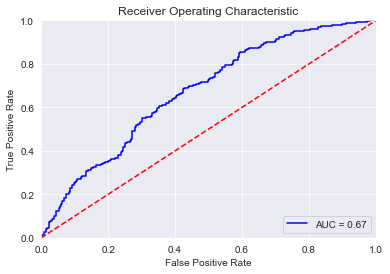

In [72]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- Al modelo le cuesta detectar las clases (hay mucho falsos positivos y negativos). 
- Detecta mucho mejor los verdaderos positivos (el resto de los modelos tenían altos falsos positivos).

## LightGBM

In [74]:
import lightgbm as lgb

In [73]:
# Se definen X e y
X = BTC_metals_2.drop (['Target'],axis=1)
y = BTC_metals_2 ['Target']

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [75]:
clf = lgb.LGBMClassifier()

Se contruye la grilla de RandomizedSearchCV.

In [78]:
# Se definelos hyperparámetros
param_grid = {'boosting_type': ['gbdt','dart','goss', 'rf'],
              'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'class_weight': ['balanced'] ,
              'n_estimators':[100, 1000, 10000],
              'subsample':[0.00001, 0.0001, 0.001, 0.01, 0.1, 0.99],
              'random_state': np.arange (1,1000,1)
              }

# Se uitiliza la RandomizedSearchCV y se agrega Cross validation con k=5 
model = RandomizedSearchCV(clf, param_grid, cv=5, n_iter=100, verbose=2)

In [79]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END boosting_type=goss, class_weight=balanced, learning_rate=100, n_estimators=1000, random_state=444, subsample=1e-05; total time=   0.2s
[CV] END boosting_type=goss, class_weight=balanced, learning_rate=100, n_estimators=1000, random_state=444, subsample=1e-05; total time=   0.2s
[CV] END boosting_type=goss, class_weight=balanced, learning_rate=100, n_estimators=1000, random_state=444, subsample=1e-05; total time=   0.2s
[CV] END boosting_type=goss, class_weight=balanced, learning_rate=100, n_estimators=1000, random_state=444, subsample=1e-05; total time=   0.2s
[CV] END boosting_type=goss, class_weight=balanced, learning_rate=100, n_estimators=1000, random_state=444, subsample=1e-05; total time=   0.1s
[CV] END boosting_type=dart, class_weight=balanced, learning_rate=0.01, n_estimators=100, random_state=83, subsample=0.01; total time=   0.1s
[CV] END boosting_type=dart, class_weight=balanced, learning_rate=0.01, n_e

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=100,
                   param_distributions={'boosting_type': ['gbdt', 'dart',
                                                          'goss', 'rf'],
                                        'class_weight': ['balanced'],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1, 10, 100,
                                                          1000],
                                        'n_estimators': [100, 1000, 10000],
                                        'random_state': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,...
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988,
       989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]),
                                        'subsample': [1e-05, 0.0001, 0.001,
                                                      0.01, 0.1, 0.99]},
                   verbose=2)

In [80]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'subsample': 0.0001, 'random_state': 934, 'n_estimators': 1000, 'learning_rate': 0.1, 'class_weight': 'balanced', 'boosting_type': 'goss'}
Mejor Score: 0.6610109770971676



In [81]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores.sort_values("mean_test_score", ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_random_state,param_n_estimators,param_learning_rate,param_class_weight,param_boosting_type,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
81,1.121659,0.145185,0.015622,7.136645e-07,0.0001,934,1000,0.1,balanced,goss,"{'subsample': 0.0001, 'random_state': 934, 'n_estimators': 1000, 'learning_rate': 0.1, 'class_weight': 'balanced', 'boosting_type': 'goss'}",0.647558,0.656051,0.660297,0.660297,0.680851,0.661011,0.010956,1
71,12.996259,1.347238,0.354159,8.439353e-02,0.00001,209,10000,0.001,balanced,goss,"{'subsample': 1e-05, 'random_state': 209, 'n_estimators': 10000, 'learning_rate': 0.001, 'class_weight': 'balanced', 'boosting_type': 'goss'}",0.660297,0.632696,0.643312,0.681529,0.661702,0.655907,0.016773,2
96,11.536420,0.542883,0.281187,9.879479e-03,0.0001,58,10000,0.001,balanced,goss,"{'subsample': 0.0001, 'random_state': 58, 'n_estimators': 10000, 'learning_rate': 0.001, 'class_weight': 'balanced', 'boosting_type': 'goss'}",0.645435,0.641189,0.643312,0.681529,0.663830,0.655059,0.015496,3
49,0.141452,0.009844,0.000408,8.155823e-04,0.99,128,100,0.1,balanced,goss,"{'subsample': 0.99, 'random_state': 128, 'n_estimators': 100, 'learning_rate': 0.1, 'class_weight': 'balanced', 'boosting_type': 'goss'}",0.636943,0.630573,0.660297,0.675159,0.657447,0.652084,0.016252,4
42,1.265453,0.135175,0.015622,8.662177e-07,0.01,106,1000,0.01,balanced,goss,"{'subsample': 0.01, 'random_state': 106, 'n_estimators': 1000, 'learning_rate': 0.01, 'class_weight': 'balanced', 'boosting_type': 'goss'}",0.634820,0.641189,0.643312,0.673036,0.661702,0.650812,0.014263,5


In [82]:
# Se ejecuta la predicción de resultados con X_test
predictions = model.predict(X_test)

In [83]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.633276740237691


In [84]:
cm = confusion_matrix(y_test,predictions)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[160 116]
 [100 213]]


Accuracy of the classifier is: 0.633276740237691
Precision Score of the classifier is: 0.6474164133738601
Recall Score of the classifier is: 0.6805111821086262
F1 Score of the classifier is: 0.6635514018691588
AUC for our classifier is: 0.6716442098439598


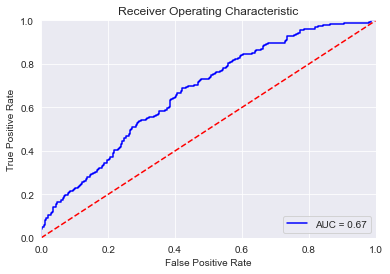

In [85]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- Al modelo le cuesta detectar las clases (hay mucho falsos positivos y negativos). 

## HistGradientBoostingClassifier

In [86]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [87]:
# Se definen X e y
X = BTC_metals_2.drop (['Target'],axis=1)
y = BTC_metals_2 ['Target']

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [88]:
Dt = HistGradientBoostingClassifier()

In [89]:
Dt.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [90]:
Dt.score(X_test, y_test)

0.6570458404074703

In [91]:
HGBC = HistGradientBoostingClassifier()

Se contruye la grilla de RandomizedSearchCV.

In [94]:
# Se definelos hyperparámetros
param_grid = {'loss':['log_loss', 'auto', 'binary_crossentropyv', 'categorical_crossentropy'],
              'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'max_iter': [100,1000,10000],
              'max_leaf_nodes': [1,15,31,65,90,150],
              'l2_regularization': [0, 1, 5, 10, 50,100],
              'warm_start': [False]}

# Se uitiliza la RandomizedSearchCV y se agrega Cross validation con k=5 
model = RandomizedSearchCV(HGBC, param_grid, cv=5, n_iter=100, verbose=2)

In [95]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END l2_regularization=10, learning_rate=100, loss=binary_crossentropyv, max_iter=10000, max_leaf_nodes=31, warm_start=False; total time=   0.0s
[CV] END l2_regularization=10, learning_rate=100, loss=binary_crossentropyv, max_iter=10000, max_leaf_nodes=31, warm_start=False; total time=   0.0s
[CV] END l2_regularization=10, learning_rate=100, loss=binary_crossentropyv, max_iter=10000, max_leaf_nodes=31, warm_start=False; total time=   0.0s
[CV] END l2_regularization=10, learning_rate=100, loss=binary_crossentropyv, max_iter=10000, max_leaf_nodes=31, warm_start=False; total time=   0.0s
[CV] END l2_regularization=10, learning_rate=100, loss=binary_crossentropyv, max_iter=10000, max_leaf_nodes=31, warm_start=False; total time=   0.0s
[CV] END l2_regularization=100, learning_rate=10, loss=categorical_crossentropy, max_iter=100, max_leaf_nodes=90, warm_start=False; total time=   0.0s
[CV] END l2_regularization=100, learning_

RandomizedSearchCV(cv=5, estimator=HistGradientBoostingClassifier(), n_iter=100,
                   param_distributions={'l2_regularization': [0, 1, 5, 10, 50,
                                                              100],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1, 10, 100,
                                                          1000],
                                        'loss': ['log_loss', 'auto',
                                                 'binary_crossentropyv',
                                                 'categorical_crossentropy'],
                                        'max_iter': [100, 1000, 10000],
                                        'max_leaf_nodes': [1, 15, 31, 65, 90,
                                                           150],
                                        'warm_start': [False]},
                   verbose=2)

In [96]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'warm_start': False, 'max_leaf_nodes': 15, 'max_iter': 10000, 'loss': 'log_loss', 'learning_rate': 0.001, 'l2_regularization': 50}
Mejor Score: 0.6686542891990784



In [97]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores.sort_values("mean_test_score", ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_warm_start,param_max_leaf_nodes,param_max_iter,param_loss,param_learning_rate,param_l2_regularization,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,68.727133,4.860169,0.817556,0.225269,False,15,10000,log_loss,0.001,50,"{'warm_start': False, 'max_leaf_nodes': 15, 'max_iter': 10000, 'loss': 'log_loss', 'learning_rate': 0.001, 'l2_regularization': 50}",0.660297,0.662420,0.664544,0.675159,0.680851,0.668654,0.007958,1
99,1.044491,0.007725,0.012497,0.006249,False,31,100,auto,0.1,100,"{'warm_start': False, 'max_leaf_nodes': 31, 'max_iter': 100, 'loss': 'auto', 'learning_rate': 0.1, 'l2_regularization': 100}",0.658174,0.679406,0.647558,0.675159,0.668085,0.665676,0.011565,2
63,1.092625,0.053152,0.010572,0.001017,False,90,100,log_loss,0.01,50,"{'warm_start': False, 'max_leaf_nodes': 90, 'max_iter': 100, 'loss': 'log_loss', 'learning_rate': 0.01, 'l2_regularization': 50}",0.636943,0.656051,0.651805,0.675159,0.665957,0.657183,0.012962,3
65,215.548609,3.598713,0.739096,0.219530,False,150,10000,auto,0.0001,0,"{'warm_start': False, 'max_leaf_nodes': 150, 'max_iter': 10000, 'loss': 'auto', 'learning_rate': 0.0001, 'l2_regularization': 0}",0.626327,0.643312,0.670913,0.675159,0.663830,0.655908,0.018397,4
7,0.128058,0.004869,0.008776,0.001162,False,65,100,auto,1000,50,"{'warm_start': False, 'max_leaf_nodes': 65, 'max_iter': 100, 'loss': 'auto', 'learning_rate': 1000, 'l2_regularization': 50}",0.649682,0.624204,0.666667,0.666667,0.657447,0.652933,0.015707,5


In [98]:
# Se ejecuta la predicción de resultados con X_test
predictions = model.predict(X_test)

In [99]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.6706281833616299


In [100]:
cm = confusion_matrix(y_test,predictions)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[178 109]
 [ 85 217]]


Accuracy of the classifier is: 0.6706281833616299
Precision Score of the classifier is: 0.6656441717791411
Recall Score of the classifier is: 0.7185430463576159
F1 Score of the classifier is: 0.6910828025477708
AUC for our classifier is: 0.7368588042550246


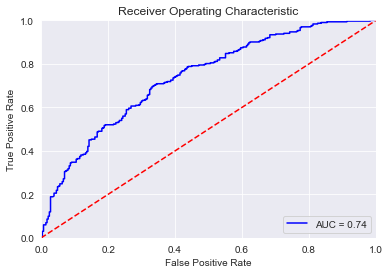

In [101]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- Al modelo le cuesta detectar las clases (hay mucho falsos positivos y negativos). 